### Example 1
Construct IPR of a vertical well in an oil reservoir. Consider (1) transient flow at 1 month, (2) steady-state flow, and (3) pseudo–steady-state flow. The following data are given:

Porosity:phi = 0.19

Effective horizontal permeability: k = 8.2 md

Pay zone thickness: h = 53 ft

Reservoir pressure: pe or p = 5651 psia

Bubble-point pressure: pb = 50 psia

Fluid formation volume factor:, Bo = 1.1

Fluid viscosity: mu =1.7 cp

Total compressibility, ct = 0.0000129 1/psi

Drainage area: A = 640 acres (re = 2980 ft)

Wellbore radius: rw = 0.328 ft

Skin factor: S = 0

In [1]:
import math
def J(k, h, Bo, mu, t, phi, ct, rw):
    """
    Compute the J function, Productivity Index (STB/D/Psi)
    
    args:
        k  : permeability (md)
        h  : Pay zone thickness (ft)
        Bo : FVF
        mu : Fluid viscosity(cp)
        t  : flow time (hours)
        phi: Porosity
        ct : Total Compressibility (1/psi)
        rw : Drainage area (ft)
        
    Returns:
        J* : STB/D/psi
    """
    J_star = k*h/(162.6*Bo*mu*(math.log(t) + math.log(k/(phi*mu*ct*rw**2)) - 3.23))
    return J_star   

In [2]:
k = 8.2       #md
h = 53.0      #ft
Bo = 1.1
mu = 1.7      #cp
t  = 720.0    #days
phi = 0.19
ct = 0.0000129 #1/psi
rw = 0.328

In [3]:
J(k, h, Bo, mu, t, phi, ct, rw)

0.07121197776617541

## (2) steady-state flow

In [4]:
def J(k, h, Bo, mu, re, rw):
    """
    Compute the J function, Productivity Index (STB/D/Psi)
    
    args:
        k  : permeability (md)
        h  : Pay zone thickness (ft)
        Bo : FVF
        mu : Fluid viscosity(cp)
        t  : flow time (hours)
        phi: Porosity
        ct : Total Compressibility (1/psi)
        rw : Drainage area (ft)
        
    Returns:
        J* : STB/D/psi
    """
    J_star = k*h/(141.2*Bo*mu*(math.log(re/rw)))
    return J_star

In [5]:
k = 8.2       #md
h = 53.0      #ft
Bo = 1.1
mu = 1.7      #cp
t  = 720.0    #days
phi = 0.19
ct = 0.0000129 #1/psi
rw = 0.328
re = 2980.0
S=0.0
p = 5651

In [6]:
J = J(k, h, Bo, mu, re, rw)
J

0.18058612101281482

In [7]:
for pwf in range(0, 5651, 500):
    Q = J * (p - pwf)
    print(Q)

1020.4921698434166
930.1991093370092
839.9060488306018
749.6129883241944
659.319927817787
569.0268673113795
478.73380680497206
388.4407462985647
298.1476857921573
207.85462528574985
117.56156477934245
27.268504272935036


In [8]:
pwf = range(0, 5651, 500)
pwf = list(pwf)
pwf

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

In [9]:
import pandas as pd

In [10]:
data1 = {1:1020.4921698434166, 2:930.1991093370092, 3:839.9060488306018,
       4:749.6129883241944, 5:659.319927817787, 6:569.0268673113795,
       7:478.73380680497206, 8:388.4407462985647, 9:298.1476857921573,
       10:207.85462528574985, 11:117.56156477934245, 12:27.268504272935036,
       13:0}

In [11]:
data2 = {1:0, 2:500, 3:1000, 4:1500, 5:2000, 6:2500, 7:3000, 8:3500,
        9:4000, 10:4500, 11:5000, 12:5500, 13:5651}

In [13]:
df = pd.DataFrame({"Q(stb/day)":data1, "pwf(psia)":data2})

In [14]:
df

,Q (stb/day),pwf (psia)
1,1020.492170,0
2,930.199109,500
3,839.906049,1000
4,749.612988,1500
5,659.319928,2000
6,569.026867,2500
7,478.733807,3000
8,388.440746,3500
9,298.147686,4000
10,207.854625,4500


In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Steady-state IPR Curve')

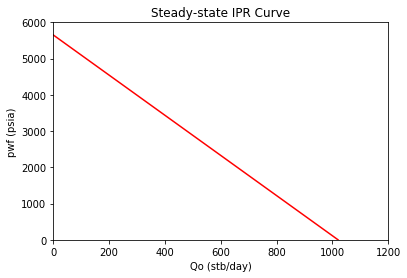

In [23]:
plt.plot(df['Q (stb/day)'], df['pwf (psia)'], 'r')
plt.xlim(0,1200)
plt.ylim(0, 6000)
plt.xlabel("Qo (stb/day)")
plt.ylabel("pwf (psia)")
plt.title("Steady-state IPR Curve")

### Example 2

Construct IPR of a vertical well in a saturated oil reservoir using Vogel’s equation. The following data are given:

Porosity: 0.19

Effective horizontal permeability: k = 8.2 md

Pay zone thickness: h = 53 ft

Reservoir pressure: p = 5,651 psia

Bubble point pressure: pb = 5,651 psia

Fluid formation volume factor: Bo = 1.1

Fluid viscosity: mu = 1.7 cp

Total compressibility: ct = 0.0000129 psi-1

Drainage area: A = 640 acres
(re = 2,980 ft)

Wellbore radius: rw = 0.328 ft

Skin factor: S = 0

In [61]:
def J(k, h, Bo, mu, re, rw, S):
    """
    Compute the J function, Productivity Index (STB/D/Psi)
    
    args:
        k  : permeability (md)
        h  : Pay zone thickness (ft)
        Bo : FVF
        mu : Fluid viscosity(cp)
        t  : flow time (hours)
        phi: Porosity
        ct : Total Compressibility (1/psi)
        rw : Drainage area (ft)
        
    Returns:
        J* : STB/D/psi
    """
    J_star = k*h/(141.2*Bo*mu*(math.log(re/rw) - (3/4) + S))
    return J_star

In [62]:
#Given Data
k = 8.2       #md
h = 53.0      #ft
Bo = 1.1
mu = 1.7      #cp
t  = 720.0    #days
phi = 0.19
ct = 0.0000129 #1/psi
rw = 0.328
re = 2980.0
S=0.0
p = 5651.0
pb = 5651.0

In [63]:
#Let's calculate J*
J(k, h, Bo, mu, re, rw, S)
J = J(k, h, Bo, mu, re, rw, S)
J

0.19677846748871472

### qmax

In [64]:
qmax = J*p/1.8
qmax

617.7750665437371

In [73]:
#Let's assume pwf betwen 0 and 5651 with 500 interval
pwf = range(0, 5651, 500)
list(pwf)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

In [71]:
#let's calculate the production rate expected from the pwf
for pwf in range(0, 5651, 500):
    q = qmax*(1-0.2*(pwf/p) - 0.8*(pwf/p)**2)
    print(round(q))

618
603
580
550
512
466
413
352
283
206
122
29


In [74]:
pwf = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 5651]
q = [618, 603, 580, 550, 512, 466, 413, 352, 283, 206, 122, 29, 0]

Text(618, 0, 'AOF')

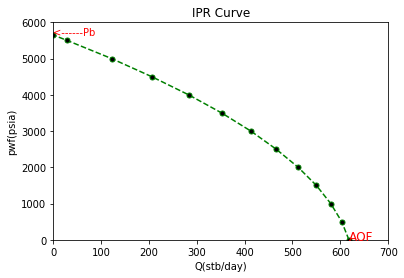

In [89]:
plt.plot(q, pwf, 'g', ls='--', marker ='o', 
         markersize=5, markerfacecolor='black')
plt.xlim(0,700)
plt.ylim(0, 6000)
plt.xlabel("Q(stb/day)")
plt.ylabel("pwf(psia)")
plt.title("IPR Curve")
plt.annotate('<------Pb', (0,5651), color='red')
plt.annotate('AOF', (618,0), fontsize=12, color ='red')